# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [ ]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

greet()

In [9]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

for radius in [1, 2, 3, 4, 5]:
    area = calculate_area(radius)
    print(f"The area of a circle with radius {radius} is {area:.2f}")

The area of a circle with radius 1 is 3.14
The area of a circle with radius 2 is 12.57
The area of a circle with radius 3 is 28.27
The area of a circle with radius 4 is 50.27
The area of a circle with radius 5 is 78.54


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [4]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

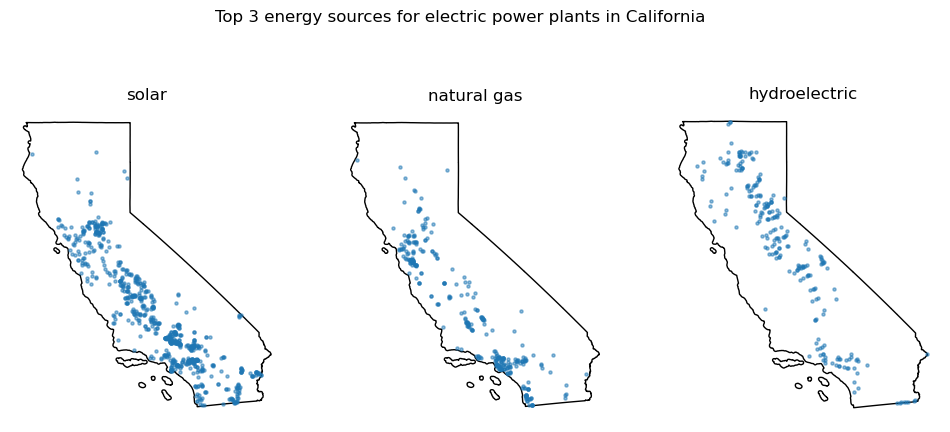

In [ ]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == "California"]

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.subplots_adjust(top=1)  # Adjust height of subplots to fit suptitle
plt.show()